In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Aula 1 - Análise abstracts

In [3]:
arqs = os.listdir('../dados')

In [5]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'../dados/{arq}')
        df = df.loc[df['Language'] == 'English']
    else:
        aux = pd.read_excel(f'../dados/{arq}')
        aux = aux.loc[aux['Language'] == 'English']
        df = pd.concat([df,aux])

In [6]:
dic_key={}

for keywords in df['Keywords Plus']:
    if not isinstance(keywords,float):
        
        keywords = keywords.split(' ')
        
        for keyword in keywords:
            if ';' in keyword:
                keyword = keyword.replace(';','')
            
            keyword = keyword.lower()
            
            if keyword not in dic_key:
                dic_key[keyword] = 1
            else:
                dic_key[keyword] += 1

dic_key = dict(sorted(dic_key.items(), key=lambda item: item[1]))

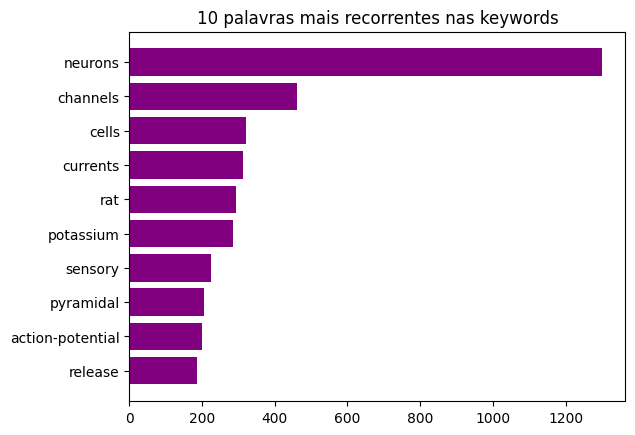

In [7]:
qtd = 10
plt.barh(list(dic_key.keys())[-qtd:],list(dic_key.values())[-qtd:],color='purple')
plt.title(f'{qtd} palavras mais recorrentes nas keywords')
plt.show()

#### Aula 2 - Extração dos valores em ms

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [9]:
limite = 20
count = 0
lista_vals = []

for abstract in df['Abstract']:
    if not isinstance(abstract,float):
        if ' ms ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='ms':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0: lista_vals.append(vals[::-1])        
        
        if ' millisecond ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='millisecond':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millisecond':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0: lista_vals.append(vals[::-1])

In [10]:
inf,sup = [],[]

for val in lista_vals:
    if 'and' not in val and 'to' not in val:
        
        if '+' in val and '/-' in val:
            if val[0] != '+':
                # print(val[0],'+/-',val[-1])
                
                if ',' in val[0]:
                    val[0] = val[0].replace(',','.')
                
                if ',' in val[-1]:
                    val[-1] = val[-1].replace(',','.')
                    
                inf.append(round(float(val[0])-float(val[-1]),4))
                sup.append(round(float(val[0])+float(val[-1]),4))
                
                # print(f'inf {float(val[0])-float(val[-1])}')
                # print(f'sup {float(val[0])+float(val[-1])}')
            # print()
            
        # elif '-' in val:
            # print(val)

In [11]:
print('Contagem de ocorrências',count)

Contagem de ocorrências 348


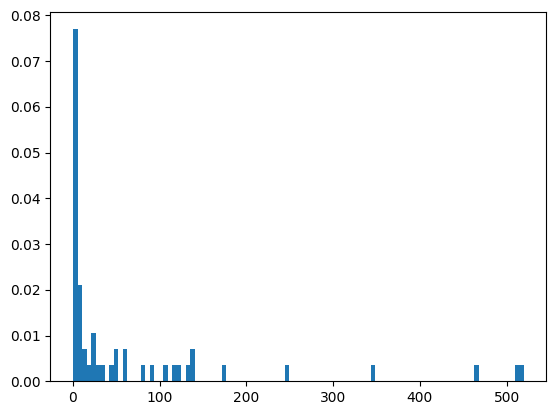

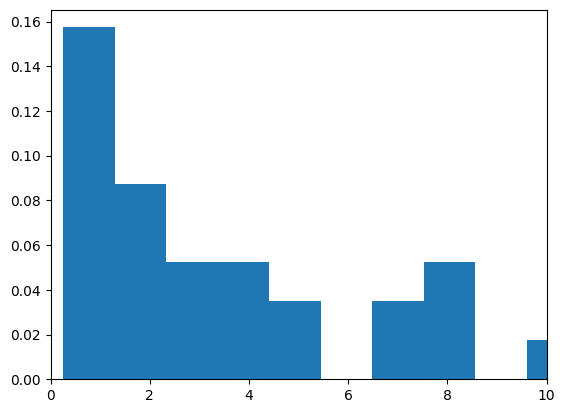

In [12]:
plt.hist(inf,bins=100,density=True)
plt.show()
plt.hist(inf,bins=500,density=True)
plt.xlim(0,10)
plt.show()

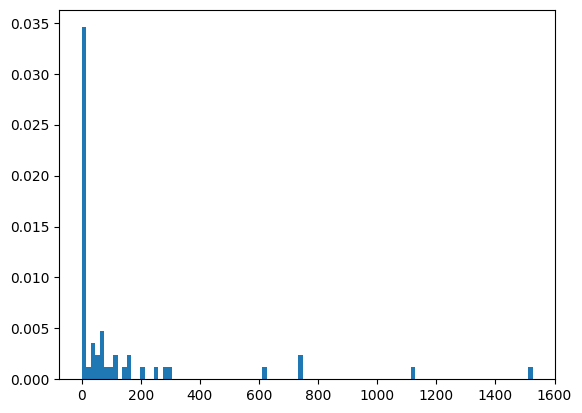

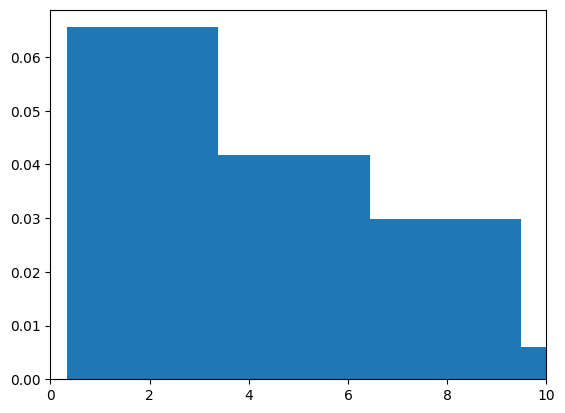

In [13]:
plt.hist(sup,bins=100,density=True)
plt.show()
plt.hist(sup,bins=500,density=True)
plt.xlim(0,10)
plt.show()

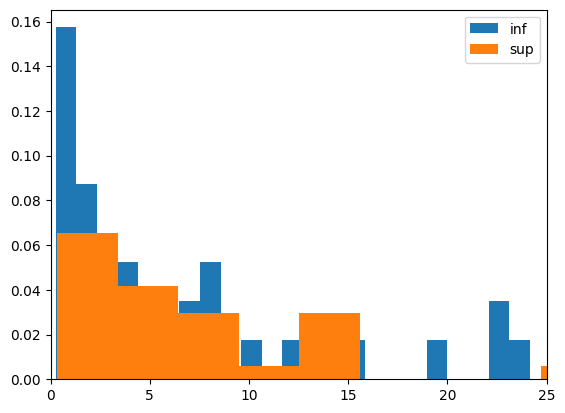

In [17]:
plt.hist(inf,bins=500,density=True,label='inf')
plt.hist(sup,bins=500,density=True,label='sup')
plt.xlim(0,25)
plt.legend()
plt.show()

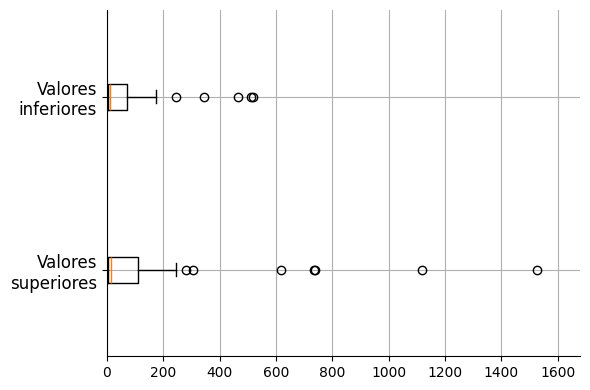

In [45]:
plt.figure(figsize=(6,4))

plt.boxplot([sup,inf],labels=['Valores\nsuperiores','Valores\ninferiores'],vert=False)
plt.grid()

plt.xlim(0,max(sup)*1.1)

plt.yticks(fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('inf x sup.png',dpi=500)

plt.show()

(array([  5.,   9., 126., 248., 282., 175., 228., 169., 179., 163.]),
 array([1979. , 1983.5, 1988. , 1992.5, 1997. , 2001.5, 2006. , 2010.5,
        2015. , 2019.5, 2024. ]),
 <BarContainer object of 10 artists>)

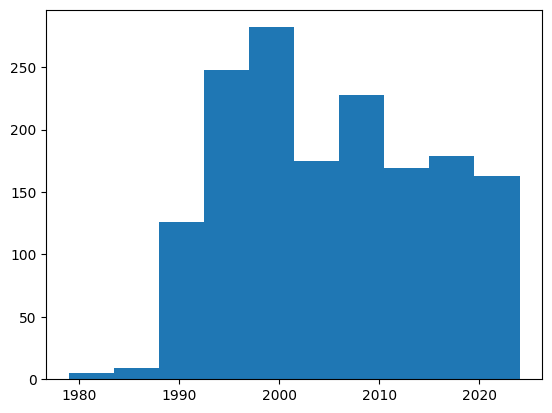

In [48]:
plt.hist(df['Publication Year'])

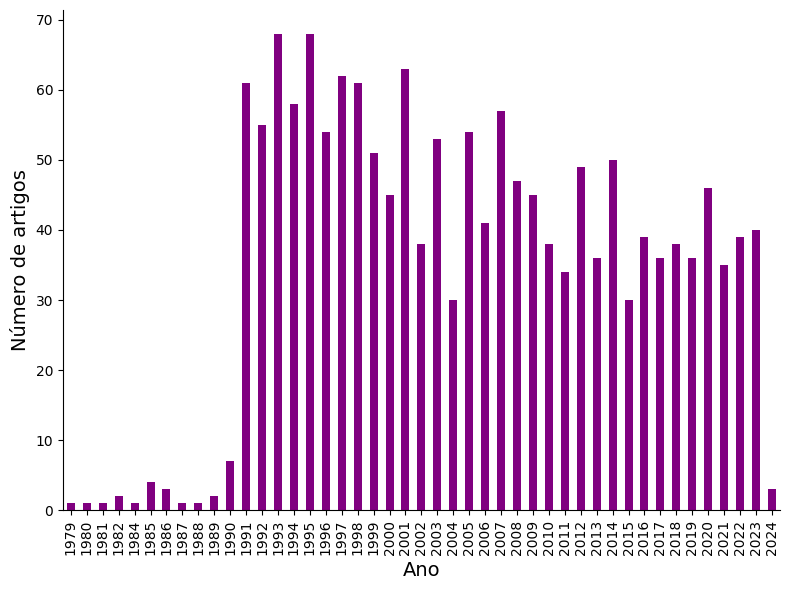

In [59]:
# Contagem de ocorrências de cada ano na coluna "Publication Year"
language_counts = df['Publication Year'].value_counts()

# Ordenar os valores pela chave (ano)
language_counts = language_counts.sort_index()

# Criar um gráfico de barras com a cor roxa
plt.figure(figsize=(8, 6))
language_counts.plot(kind='bar', color='purple')  # Mudar a cor para roxo
# plt.title('Ano de Publicação')
plt.xlabel('Ano',fontsize=14)
plt.ylabel('Número de artigos',fontsize=14)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar layout para evitar cortar rótulos

plt.xticks(fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('ano_publicacao.png',dpi=500)

plt.show()